In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
well_fov = "C4-2"
stats_path = pathlib.Path("../../2.cellprofiling/results/run_stats/").resolve(
    strict=True
)
output_path = pathlib.Path(f"../results/converted_profiles/{well_fov}").resolve()
output_path.mkdir(parents=True, exist_ok=True)

stats_files = list(stats_path.glob("*.parquet"))
stats_files.sort()
stats_files

[PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/2.cellprofiling/results/run_stats/C4-2_Intensity.parquet'),
 PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/2.cellprofiling/results/run_stats/C4-2_Intensity_gpu.parquet'),
 PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/2.cellprofiling/results/run_stats/C4-2_Neighbors.parquet'),
 PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/2.cellprofiling/results/run_stats/C4-2_Texture.parquet'),
 PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/2.cellprofiling/results/run_stats/C4-2_area_size_shape.parquet'),
 PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/2.cellprofiling/results/run_stats/C4-2_area_size_shape_gpu.parquet'),
 PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/2.cellprofiling/results/run_stats/C4-2_colocalization.parquet'),
 PosixPath('/home/lippincm/Documents/GFF_3D_organoid_

In [5]:
df = pd.concat(
    [pd.read_parquet(stats_file) for stats_file in stats_files],
    ignore_index=True,
)
df.to_parquet(output_path / f"{well_fov}_cell_stats.parquet", index=False)
df["feature_type_and_gpu"] = (
    df["feature_type"].astype(str) + "_" + df["gpu"].astype(str)
)
df["feature_type_and_gpu"] = df["feature_type_and_gpu"].str.replace("None", "CPU")
df["feature_type_and_gpu"] = df["feature_type_and_gpu"].str.replace("True", "GPU")
df["time_taken_minutes"] = df["time_taken"] / 60
df["mem_usage_GB"] = df["mem_usage"] / (1024)
df.head(10)

,start_time,end_time,start_mem,end_mem,time_taken,mem_usage,gpu,well_fov,feature_type,feature_type_and_gpu,time_taken_minutes,mem_usage_GB
0,1.745173e+09,1.745175e+09,1314.308594,1312.730469,1678.591859,-1.578125,None,C4-2,Intensity,Intensity_CPU,27.976531,-0.001541
1,1.745176e+09,1.745184e+09,1463.007812,4629.117188,8601.820257,3166.109375,True,C4-2,Intensity,Intensity_GPU,143.363671,3.091904
2,1.745173e+09,1.745173e+09,1255.957031,1869.132812,23.976288,613.175781,None,C4-2,Neighbors,Neighbors_CPU,0.399605,0.598804
3,1.745513e+09,1.745513e+09,1203.839844,1837.910156,123.038292,634.070312,None,C4-2,Texture,Texture_CPU,2.050638,0.619209
4,1.745173e+09,1.745173e+09,1258.332031,1888.757812,102.551295,630.425781,None,C4-2,area_size_shape,area_size_shape_CPU,1.709188,0.615650
5,1.745248e+09,1.745248e+09,1227.140625,3201.316406,48.875798,1974.175781,True,C4-2,area_size_shape,area_size_shape_GPU,0.814597,1.927906
6,1.745173e+09,1.745173e+09,1268.015625,1268.500000,86.132144,0.484375,None,C4-2,colocalization,colocalization_CPU,1.435536,0.000473
7,1.745177e+09,1.745178e+09,1283.964844,2865.761719,1161.257747,1581.796875,True,C4-2,colocalization,colocalization_GPU,19.354296,1.544724
8,1.745173e+09,1.745180e+09,1282.359375,1960.277344,7017.786190,677.917969,None,C4-2,granularity,granularity_CPU,116.963103,0.662029
9,1.745251e+09,1.745254e+09,1226.464844,3496.660156,2875.331704,2270.195312,True,C4-2,granularity,granularity_GPU,47.922195,2.216988


## Preliminary plots - will finalize in R later

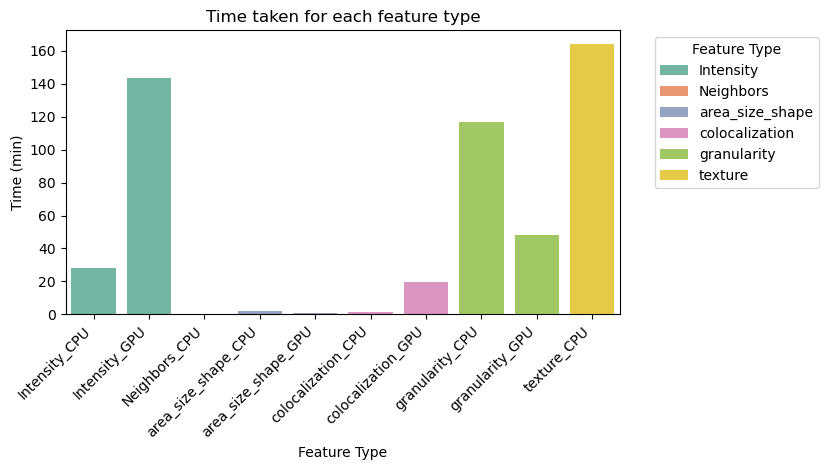

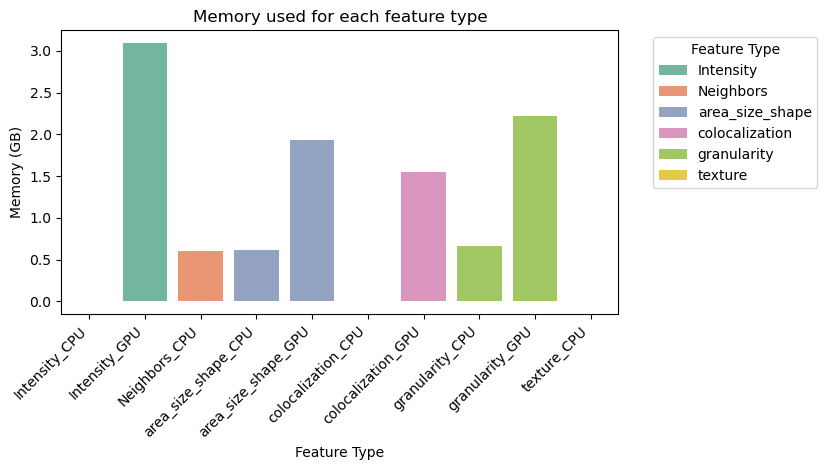

In [4]:
# plot the memory and time for each feature type

sns.barplot(
    data=df,
    x="feature_type_and_gpu",
    y="time_taken_minutes",
    hue="feature_type",
    palette="Set2",
)
plt.title("Time taken for each feature type")
plt.xlabel("Feature Type")
plt.ylabel("Time (min)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# move the legend outside the plot
plt.legend(title="Feature Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

sns.barplot(
    data=df,
    x="feature_type_and_gpu",
    y="mem_usage_GB",
    hue="feature_type",
    palette="Set2",
)
plt.title("Memory used for each feature type")
plt.xlabel("Feature Type")
plt.ylabel("Memory (GB)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Feature Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()